In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data_1= pd.read_csv('../data/vic_df_with_avg_price.csv')
data_2= pd.read_csv('../data/predicted_suburb_1.csv')
data_2 = data_2.rename(columns={'2019-2020': 'income'})

In [2]:
filtered_data_1 = data_1[data_1['postcode'].isin(data_2['Postcode'])]
merged_data = filtered_data_1.merge(data_2, left_on='postcode', right_on='Postcode', how='inner')
selected_data = merged_data[['Weekly Price', 'Postcode', 'Beds', 'Baths', 'Parking','distance_to_train', 'distance_to_cbd', 'Distance to Nearest Park', 'distance_to_school', 'distance_to_mall', 'distance_to_hospital', 'Population Density', 'income']]
print(selected_data.columns)

Index(['Weekly Price', 'Postcode', 'Beds', 'Baths', 'Parking',
       'distance_to_train', 'distance_to_cbd', 'Distance to Nearest Park',
       'distance_to_school', 'distance_to_mall', 'distance_to_hospital',
       'Population Density', 'income'],
      dtype='object')


In [3]:
# Features and target variables
X = selected_data[['Beds', 'Baths', 'Parking', 'distance_to_train', 'distance_to_cbd', 'Distance to Nearest Park', 'distance_to_school', 'distance_to_mall', 'distance_to_hospital', 'Population Density', 'income']]
y = selected_data['Weekly Price']

# Seperate the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Linear regression model prediction
y_pred_lr = linear_reg.predict(X_test_scaled)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R-squared:", r2_lr)

Linear Regression MSE: 30290.940155804503
Linear Regression RMSE: 174.0429261872039
Linear Regression R-squared: 0.41453391440893783


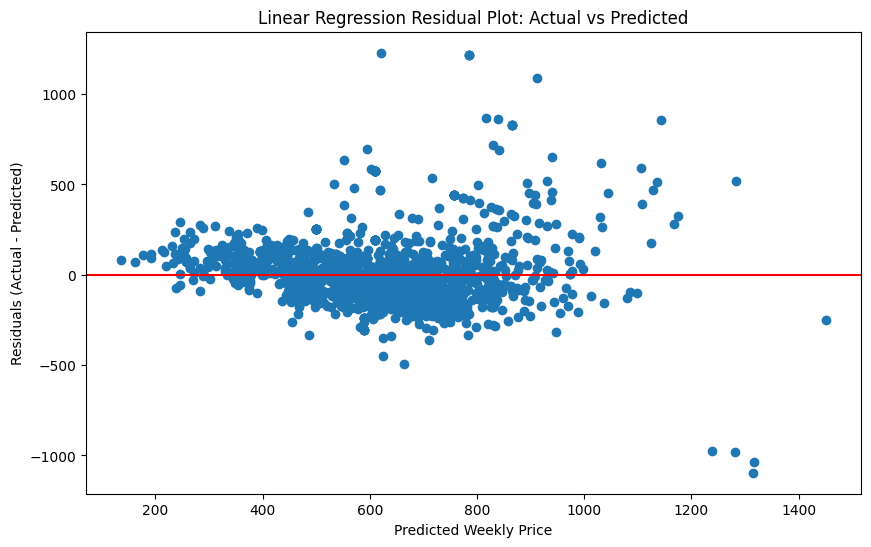

In [17]:
# Calculate residuals (actual - predicted)
residuals = y_test - y_pred_lr

# Create a residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='red')
plt.title("Linear Regression Residual Plot: Actual vs Predicted")
plt.xlabel("Predicted Weekly Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

In [5]:
# Train a random forest regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Random forest regression model prediction
y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest MSE: 14053.601595458476
Random Forest RMSE: 118.54788735130828
Random Forest R-squared: 0.728370691955142


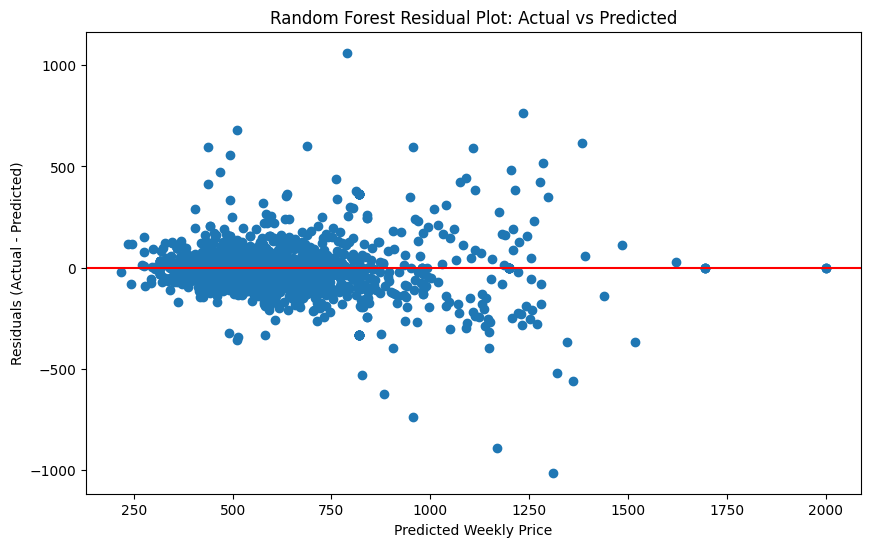

In [16]:
# Calculate residuals (actual - predicted)
residuals = y_test - y_pred_rf

# Create a residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='red')
plt.title("Random Forest Residual Plot: Actual vs Predicted")
plt.xlabel("Predicted Weekly Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

In [6]:
predicted_price = random_forest.predict(X)
selected_data['Predicted Price'] = predicted_price
selected_data.columns

/var/folders/jy/824mnhn54mn30z3y8_ny4w480000gn/T/ipykernel_51763/3027401254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Predicted Price'] = predicted_price


Index(['Weekly Price', 'Postcode', 'Beds', 'Baths', 'Parking',
       'distance_to_train', 'distance_to_cbd', 'Distance to Nearest Park',
       'distance_to_school', 'distance_to_mall', 'distance_to_hospital',
       'Population Density', 'income', 'Predicted Price'],
      dtype='object')

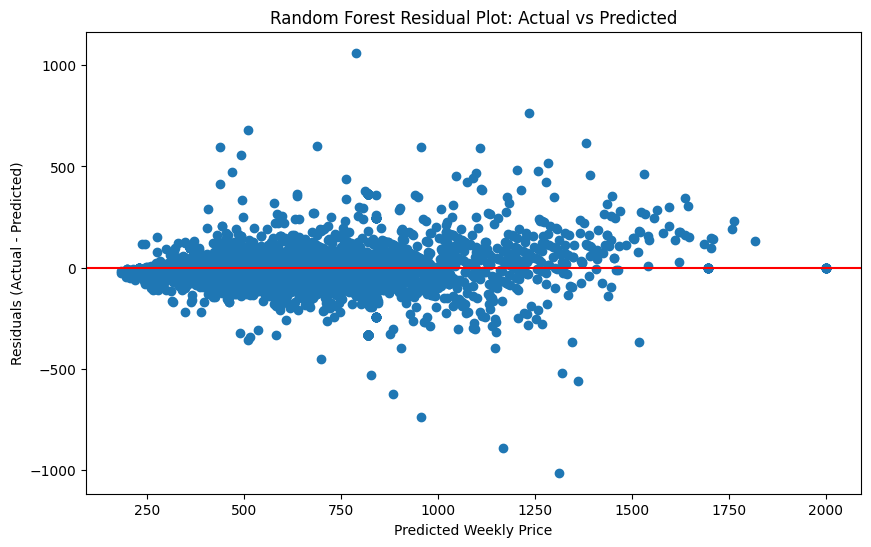

In [20]:
# Calculate residuals (actual - predicted)
residuals = selected_data['Weekly Price'] - selected_data['Predicted Price']

# Create a residual plot
plt.figure(figsize=(10,6))
plt.scatter(selected_data['Predicted Price'], residuals)
plt.axhline(y=0, color='red')
plt.title("Random Forest Residual Plot: Actual vs Predicted")
plt.xlabel("Predicted Weekly Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

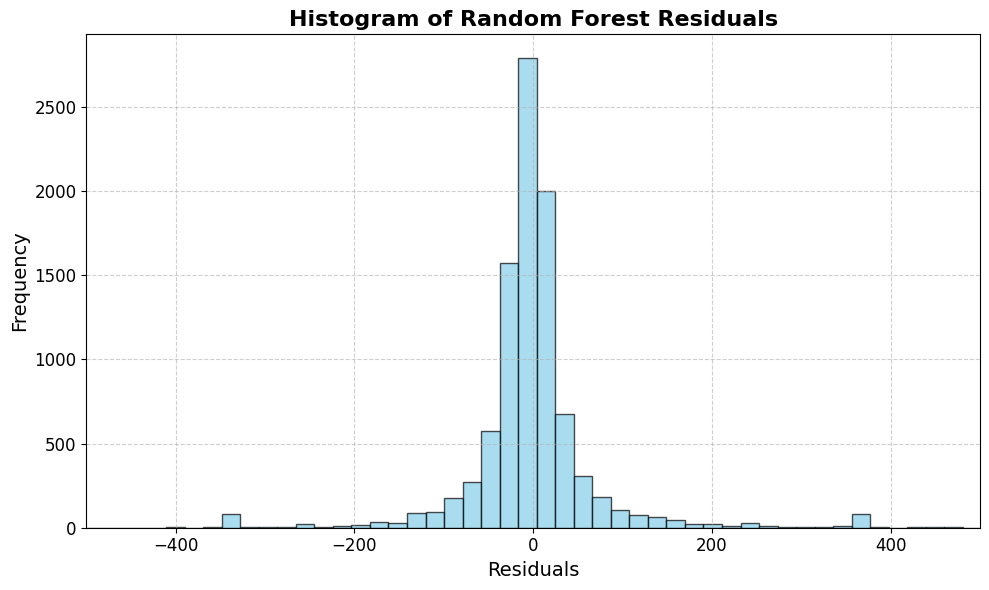

In [36]:
# Calculate residuals (actual - predicted)
residuals = selected_data['Weekly Price'] - selected_data['Predicted Price']

plt.figure(figsize=(10, 6))

# Plot the histogram of residuals
plt.hist(residuals, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Random Forest Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-500, 500)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
grouped_data = selected_data.groupby('Postcode').mean()
print(grouped_data['Predicted Price'])

Postcode
3000     586.236634
3002     755.283736
3003     693.923130
3006     771.505116
3008     695.839760
           ...     
3929     855.535952
3930    1017.795455
3936     645.790278
3976     557.611513
3977     581.234329
Name: Predicted Price, Length: 129, dtype: float64


In [8]:
# List of features to standardize
features_to_scale = ['Predicted Price', 'distance_to_train', 'distance_to_cbd', 'distance_to_school', 
                     'distance_to_mall', 'Distance to Nearest Park', 
                     'distance_to_hospital', 'Population Density', 'income']


In [38]:
# Percentage of weight assigned to each feature (these can be adjusted to different needs)
weight_train = 0.1
weight_cbd = 0.2
weight_school = 0.1
weight_mall = 0.1
weight_park = 0.1
weight_hospital = 0.1
weight_density = 0.25
weight_income = 0.05

# Calculate the comprehensive index
grouped_data['comprehensive_index'] = (
    weight_train * grouped_data['distance_to_train'] +
    weight_cbd * grouped_data['distance_to_cbd'] +
    weight_school * grouped_data['distance_to_school'] +
    weight_mall * grouped_data['distance_to_mall'] +
    weight_park * grouped_data['Distance to Nearest Park'] +
    weight_hospital * grouped_data['distance_to_hospital'] +
    weight_density * grouped_data['Population Density'] +
    weight_income * grouped_data['income']
)
final_score = grouped_data['comprehensive_index'] - grouped_data['Predicted Price']  # Subtract the predicted house price to calculate the final score
grouped_data['final_score'] = final_score

# Sort by comprehensive index from highest to lowest
sorted_data = grouped_data.sort_values(by='final_score', ascending=False)
print(sorted_data['final_score'][:10])

Postcode
3000    7094.178644
3006    5928.667686
3141    4714.888943
3181    4637.108574
3065    4548.862428
3121    4396.391481
3184    4375.166716
3053    4368.431795
3205    4335.346173
3182    4281.236544
Name: final_score, dtype: float64


In [10]:
# Students
weight_train = 0.1
weight_cbd = 0.25
weight_school = 0.25
weight_mall = 0.1
weight_park = 0.1
weight_hospital = 0.05
weight_density = 0.15
weight_income = 0

grouped_data['comprehensive_index'] = (
    weight_train * grouped_data['distance_to_train'] +
    weight_cbd * grouped_data['distance_to_cbd'] +
    weight_school * grouped_data['distance_to_school'] +
    weight_mall * grouped_data['distance_to_mall'] +
    weight_park * grouped_data['Distance to Nearest Park'] +
    weight_hospital * grouped_data['distance_to_hospital'] +
    weight_density * grouped_data['Population Density'] +
    weight_income * grouped_data['income']
)

final_score = grouped_data['comprehensive_index'] - grouped_data['Predicted Price'] 
grouped_data['final_score'] = final_score

sorted_data = grouped_data.sort_values(by='final_score', ascending=False)
print(sorted_data['final_score'][:10])

Postcode
3000    3104.165160
3006    1633.463090
3053    1176.869573
3182     522.455816
3065     501.403070
3181     475.494782
3141     467.625687
3008     393.333353
3183     360.257076
3057     273.240591
Name: final_score, dtype: float64


In [11]:
# Employees
weight_train = 0.25
weight_cbd = 0.25
weight_school = 0
weight_mall = 0.15
weight_park = 0.1
weight_hospital = 0.05
weight_density = 0.15
weight_income = 0.05

grouped_data['comprehensive_index'] = (
    weight_train * grouped_data['distance_to_train'] +
    weight_cbd * grouped_data['distance_to_cbd'] +
    weight_school * grouped_data['distance_to_school'] +
    weight_mall * grouped_data['distance_to_mall'] +
    weight_park * grouped_data['Distance to Nearest Park'] +
    weight_hospital * grouped_data['distance_to_hospital'] +
    weight_density * grouped_data['Population Density'] +
    weight_income * grouped_data['income']
)

final_score = grouped_data['comprehensive_index'] - grouped_data['Predicted Price']  
grouped_data['final_score'] = final_score

sorted_data = grouped_data.sort_values(by='final_score', ascending=False)
print(sorted_data['final_score'][:10])

Postcode
3000    4634.372637
3006    4326.323659
3181    3939.962382
3141    3935.979775
3121    3792.042197
3184    3770.378343
3065    3715.869908
3205    3673.665851
3003    3609.587932
3067    3591.457832
Name: final_score, dtype: float64
